# Imports

In [13]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import string
import re

In [14]:
# Store stopwords in a variable
# stopwords are commonly used words that do not add any value such as "an, is, the" 
stopwords = set(STOPWORDS)

# Grab Data

In [15]:
# Read in data for banking news snapshot (banking news articles for last 30 days from 4/10/2023)
df_banking_snapshot = pd.read_csv("News_Snapshots/banking_snapshot_410.csv")
df_banking_snapshot.head(5)

,Unnamed: 0,date,summary
0,0,2023-03-17,Engadget Podcast: Why did Silicon Valley Bank ...
1,1,2023-03-13,US regulators will protect all deposits at Sil...
2,2,2023-03-11,USDC stablecoin breaks dollar peg following Si...
3,3,2023-03-13,SVB’s Collapse Is Causing Chaos in India’s Tec...
4,4,2023-03-15,Why Did Silicon Valley Bank and Signature Bank...


In [16]:
# Read in data for crypto news snapshot (crypto news articles for last 30 days from 4/10/2023)
df_crypto_snapshot = pd.read_csv("News_Snapshots/crypto_snapshot_410.csv")
df_crypto_snapshot.head(5)

,Unnamed: 0,date,summary
0,0,2023-04-06,You Can Remove That Stupid Doge Icon From Your...
1,1,2023-04-04,Judge Lets AT&T Off the Hook for Crypto Invest...
2,2,2023-04-06,Dogecoin's sharp rally fades after brief burst...
3,3,2023-03-27,Michael Saylor's MicroStrategy snaps up anothe...
4,4,2023-03-16,"Crypto Faces a Banking Crisis. For Some, It’s ..."


# Function to make wordclouds

In [17]:
def make_wordcloud(df_col):
    comment_words = ''
    for row in df_col:
        text = "".join([char.lower() for char in row if char not in string.punctuation])
        tokens = re.split('\W+', text)
        comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

# Apply function to specific datasets

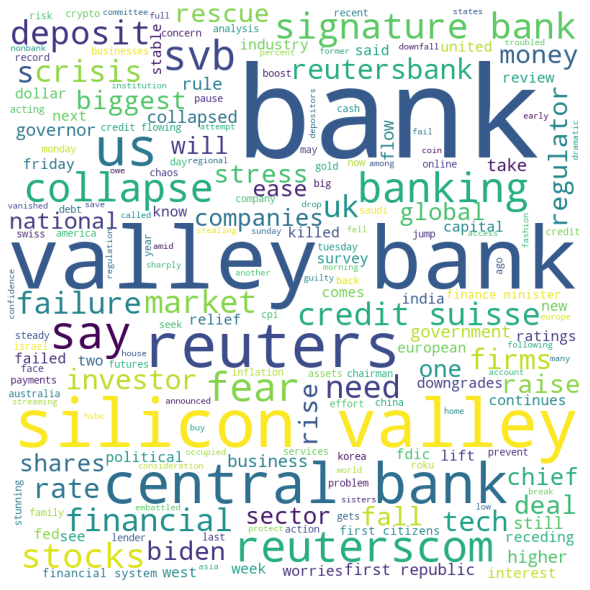

In [18]:
# Make wordcloud for banking news snapshot (banking news articles for last 30 days from 4/10/2023)
make_wordcloud(df_banking_snapshot["summary"])

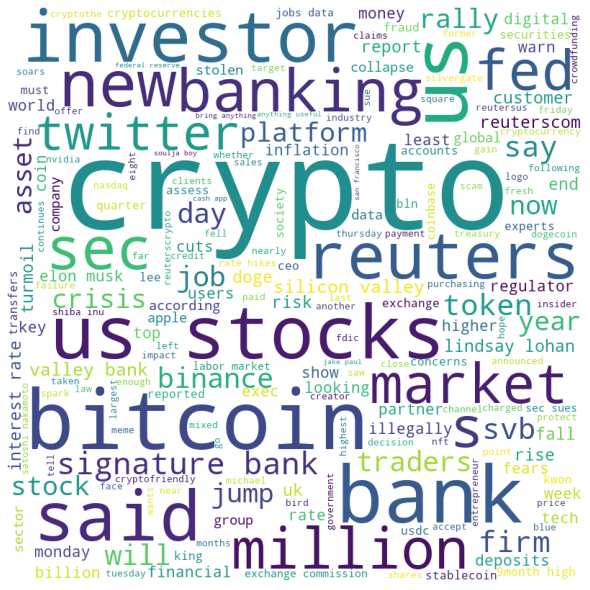

In [19]:
# Make wordcloud for crypto news snapshot (crypto news articles for last 30 days from 4/10/2023)
make_wordcloud(df_crypto_snapshot["summary"])